# Predict from web_code

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv(
    "./dataset/phishing_complete_dataset.csv",
    sep=",",
    quotechar='"',
    nrows=2000
)

dataset.head()

,rec_id,url,website,result,created_date,webpage_code
0,1,http://intego3.info/EXEL/index.php,1613573972338075.html,1,2021-02-17 20:29:32,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T..."
1,2,https://www.mathopenref.com/segment.html,1635698138155948.html,0,2021-10-31 16:35:38,<!DOCTYPE html>\n<html>\n <head>\n <title>\n ...
2,3,https://www.computerhope.com/issues/ch000254.htm,1635699228889266.html,0,2021-10-31 16:53:48,<!DOCTYPE html>\n<!--[if lt IE 7]><html class=...
3,4,https://www.investopedia.com/terms/n/next-elev...,1635750062162701.html,0,2021-11-01 12:31:02,"<!DOCTYPE html>\n<html class=""comp no-js terms..."
4,5,https://jobs.emss.org.uk/lcc.aspx,161356510250721.html,0,2021-02-17 18:01:42,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."


In [3]:
# Check dataset shape and class distribution
print(f"Dataset shape: {dataset.shape}")
print(f"\nClass distribution:")
print(dataset['result'].value_counts())
print(f"\nClass distribution (percentages):")
print(dataset['result'].value_counts(normalize=True) * 100)

# Check for missing values
print(f"\nMissing values:")
print(dataset.isnull().sum())

# Check length of webpage_code
dataset['code_length'] = dataset['webpage_code'].str.len()
print(f"\nWebpage code length statistics:")
print(dataset['code_length'].describe())

Dataset shape: (2000, 6)

Class distribution:
result
0    1253
1     747
Name: count, dtype: int64

Class distribution (percentages):
result
0    62.65
1    37.35
Name: proportion, dtype: float64

Missing values:
rec_id          0
url             0
website         0
result          0
created_date    0
webpage_code    0
dtype: int64

Webpage code length statistics:
count    2.000000e+03
mean     1.114338e+05
std      1.831948e+05
min      1.020000e+02
25%      9.447000e+03
50%      5.111200e+04
75%      1.252718e+05
max      1.923929e+06
Name: code_length, dtype: float64


In [4]:
# Prepare the data
# Features (X) = webpage_code, Target (y) = result
X = dataset['webpage_code']
y = dataset['result']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Features shape: (2000,)
Target shape: (2000,)
Target distribution:
result
0    1253
1     747
Name: count, dtype: int64

Training set size: 1600
Test set size: 400
Training target distribution:
result
0    1002
1     598
Name: count, dtype: int64
Test target distribution:
result
0    251
1    149
Name: count, dtype: int64


In [2]:
# Create different machine learning pipelines
# Each pipeline includes text vectorization and a classifier

# Pipeline 1: TF-IDF + Naive Bayes
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

# Pipeline 2: TF-IDF + Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Pipeline 3: TF-IDF + Random Forest
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Pipeline 4: Count Vectorizer + Naive Bayes
count_nb_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

# Pipeline 5: Count Vectorizer + Random Forest
count_rf_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Pipeline 6: Count Vectorizer + Logistic Regression
count_lr_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Pipeline 7: TF-IDF + Decision Tree
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Pipeline 8: TF-IDF + Gradient Boosting
gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Pipeline 9: TF-IDF + XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2), dtype=np.float32)),
    ('classifier', xgb.XGBClassifier(random_state=42, verbosity=0))
])

# Pipeline 10: TF-IDF + LightGBM
lgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2), dtype=np.float32)),
    ('classifier', lgb.LGBMClassifier(random_state=42, verbose=-1))
])

# Pipeline 11: Count Vectorizer + Decision Tree
count_dt_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Pipeline 12: Count Vectorizer + Gradient Boosting
count_gb_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Pipeline 13: Count Vectorizer + XGBoost
count_xgb_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2), dtype=np.float32)),
    ('classifier', xgb.XGBClassifier(random_state=42, verbosity=0))
])

# Pipeline 14: Count Vectorizer + LightGBM
count_lgb_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2), dtype=np.float32)),
    ('classifier', lgb.LGBMClassifier(random_state=42, verbose=-1))
])

# Pipeline 15: TF-IDF + SVC
svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', SVC(kernel='linear', random_state=42, max_iter=1000))
])

# Pipeline 16: Count Vectorizer + SVC
count_svc_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', SVC(kernel='linear', random_state=42, max_iter=1000))
])

# Pipeline 17: TF-IDF + AdaBoost
ada_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1), random_state=42))
])

# Pipeline 18: TF-IDF + Extra Trees
extra_trees_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', ExtraTreesClassifier(n_estimators=100, random_state=42))
])

# Pipeline 19: Count Vectorizer + AdaBoost
count_ada_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1), random_state=42))
])

# Pipeline 20: Count Vectorizer + Extra Trees
count_extra_trees_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=5000,
     stop_words='english', ngram_range=(1, 2))),
    ('classifier', ExtraTreesClassifier(n_estimators=100, random_state=42))
])


# Store all pipelines
pipelines = {
    'Naive Bayes (TF-IDF)': nb_pipeline,
    'Logistic Regression (TF-IDF)': lr_pipeline,
    'Random Forest (TF-IDF)': rf_pipeline,
    'Naive Bayes (Count)': count_nb_pipeline,
    'Random Forest (Count)': count_rf_pipeline,
    'Logistic Regression (Count)': count_lr_pipeline,
    'Decision Tree (TF-IDF)': dt_pipeline,
    'Gradient Boosting (TF-IDF)': gb_pipeline,
    'XGBoost (TF-IDF)': xgb_pipeline,
    'LightGBM (TF-IDF)': lgb_pipeline,
    'Decision Tree (Count)': count_dt_pipeline,
    'Gradient Boosting (Count)': count_gb_pipeline,
    'XGBoost (Count)': count_xgb_pipeline,
    'LightGBM (Count)': count_lgb_pipeline,
    'SVC (TF-IDF)': svc_pipeline,
    'SVC (Count)': count_svc_pipeline,
    'AdaBoost (TF-IDF)': ada_pipeline,
    'Extra Trees (TF-IDF)': extra_trees_pipeline,
    'Extra Trees (Count)': count_extra_trees_pipeline,
    'AdaBoost (Count)': count_ada_pipeline
}

print("Pipelines created successfully!")

Pipelines created successfully!


In [6]:
# Train and evaluate all models
results = {}

print("Training and evaluating models...")
print("=" * 50)

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")

    try:
        # Train the model
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'predictions': y_pred,
            'model': pipeline
        }

    except Exception as e:
        print(f"Error training {name}: {e}")

print(f"\n{'='*50}")
print("Training completed!")

Training and evaluating models...

Training Naive Bayes (TF-IDF)...

Training Logistic Regression (TF-IDF)...

Training Random Forest (TF-IDF)...

Training Naive Bayes (Count)...

Training Random Forest (Count)...

Training Logistic Regression (Count)...

Training Decision Tree (TF-IDF)...

Training Gradient Boosting (TF-IDF)...

Training XGBoost (TF-IDF)...

Training LightGBM (TF-IDF)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Training Decision Tree (Count)...

Training Gradient Boosting (Count)...

Training XGBoost (Count)...

Training LightGBM (Count)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Training SVC (TF-IDF)...

Training SVC (Count)...

Training AdaBoost (TF-IDF)...

Training Extra Trees (TF-IDF)...

Training Extra Trees (Count)...

Training AdaBoost (Count)...

Training completed!


Model Performance Comparison:
                       Model  Accuracy  F1 Score
             XGBoost (Count)    0.9550  0.939189
            XGBoost (TF-IDF)    0.9550  0.938356
           LightGBM (TF-IDF)    0.9450  0.926174
  Gradient Boosting (TF-IDF)    0.9425  0.922034
            LightGBM (Count)    0.9425  0.921502
   Gradient Boosting (Count)    0.9400  0.920000
         Extra Trees (Count)    0.9350  0.910345
       Random Forest (Count)    0.9325  0.907216
      Random Forest (TF-IDF)    0.9275  0.900344
        Extra Trees (TF-IDF)    0.9250  0.895105
           AdaBoost (TF-IDF)    0.9150  0.886667
            AdaBoost (Count)    0.9125  0.883721
Logistic Regression (TF-IDF)    0.8925  0.849123
                SVC (TF-IDF)    0.8925  0.854237
       Decision Tree (Count)    0.8900  0.851351
        Naive Bayes (TF-IDF)    0.8525  0.803987
      Decision Tree (TF-IDF)    0.8475  0.800000
 Logistic Regression (Count)    0.8450  0.801282
                 SVC (Count)    0.8425 

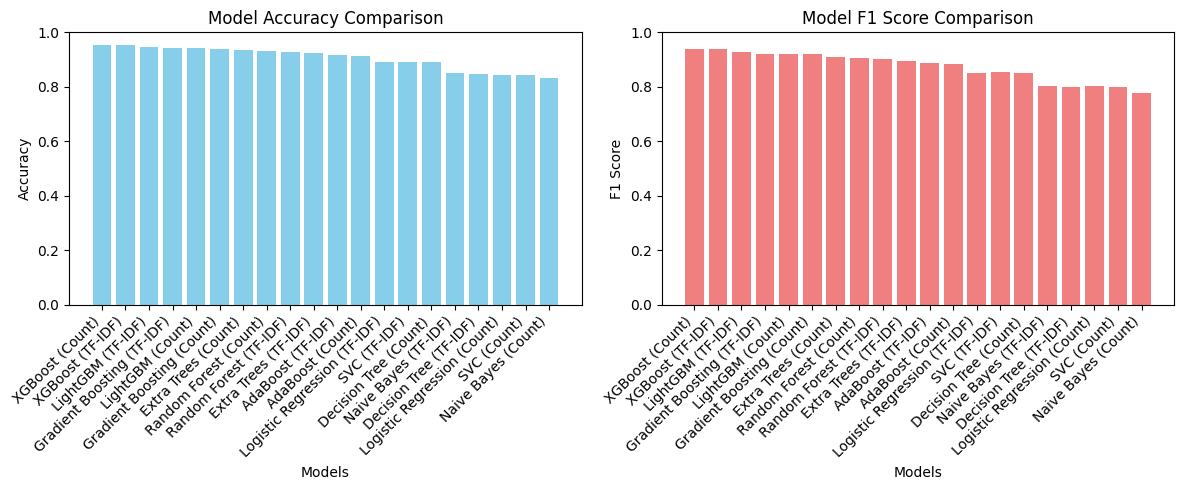

In [7]:
# Compare model performances
print("Model Performance Comparison:")
print("=" * 60)

# Create comparison dataframe
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'F1 Score': result['f1_score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print(comparison_df.to_string(index=False))

# Find the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name}")
print(f"Best accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(range(len(comparison_df)), comparison_df['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(range(len(comparison_df)),
           comparison_df['Model'], rotation=45, ha='right')
plt.ylim(0, 1)

# Plot 2: F1 Score comparison
plt.subplot(1, 2, 2)
plt.bar(range(len(comparison_df)),
        comparison_df['F1 Score'], color='lightcoral')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(range(len(comparison_df)),
           comparison_df['Model'], rotation=45, ha='right')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

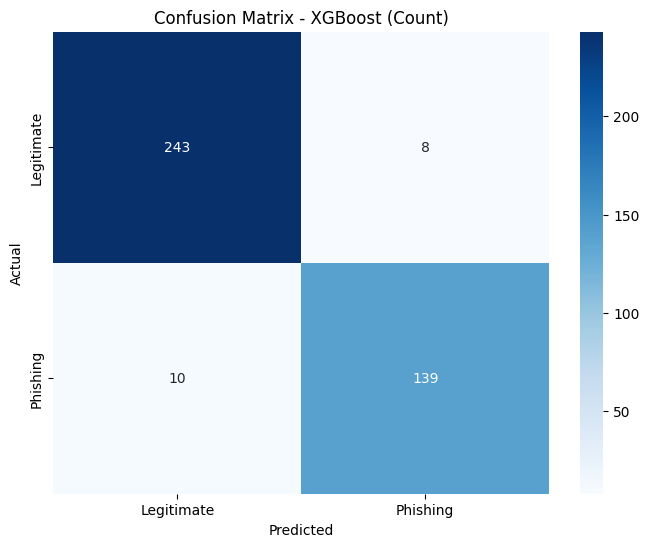

In [8]:
# Create confusion matrix for the best model
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Function to predict if a webpage is phishing or legitimate
def predict_webpage_status(webpage_code, model=None):
    """
    Predict if a webpage is phishing (1) or legitimate (0) based on its HTML code.

    Parameters:
    webpage_code (str): The HTML code of the webpage
    model: The trained model to use for prediction (default: best model)

    Returns:
    dict: Prediction result with probability scores
    """
    if model is None:
        model = best_model

    # Make prediction
    prediction = model.predict([webpage_code])[0]

    # Get prediction probabilities
    probabilities = model.predict_proba([webpage_code])[0]

    # Create result dictionary
    result = {
        'prediction': prediction,
        'status': 'Phishing' if prediction == 1 else 'Legitimate',
        'confidence': max(probabilities),
        'probability_legitimate': probabilities[0],
        'probability_phishing': probabilities[1]
    }

    return result


# Test the function with a sample from the test set
sample_index = 22
sample_code = X_test.iloc[sample_index]
actual_label = y_test.iloc[sample_index]

prediction_result = predict_webpage_status(sample_code)

print("Testing the prediction function:")
print("=" * 40)
print(
    f"Actual label: {actual_label} ({'Phishing' if actual_label == 1 else 'Legitimate'})")
print(f"Predicted: {prediction_result['status']}")
print(f"Confidence: {prediction_result['confidence']:.4f}")
print(
    f"Probability Legitimate: {prediction_result['probability_legitimate']:.4f}")
print(f"Probability Phishing: {prediction_result['probability_phishing']:.4f}")

# Test with a few more samples
print(f"\nTesting with 5 random samples:")
print("=" * 50)
for i in range(5):
    sample_code = X_test.iloc[i]
    actual_label = y_test.iloc[i]
    prediction_result = predict_webpage_status(sample_code)

    correct = "✓" if prediction_result['prediction'] == actual_label else "✗"
    print(f"Sample {i+1}: Actual: {actual_label}, Predicted: {prediction_result['prediction']}, "
          f"Confidence: {prediction_result['confidence']:.3f} {correct}")

Testing the prediction function:
Actual label: 0 (Legitimate)
Predicted: Legitimate
Confidence: 0.9999
Probability Legitimate: 0.9999
Probability Phishing: 0.0001

Testing with 5 random samples:
Sample 1: Actual: 0, Predicted: 0, Confidence: 1.000 ✓
Sample 2: Actual: 0, Predicted: 0, Confidence: 0.855 ✓
Sample 3: Actual: 0, Predicted: 0, Confidence: 0.999 ✓
Sample 4: Actual: 0, Predicted: 0, Confidence: 1.000 ✓
Sample 5: Actual: 1, Predicted: 1, Confidence: 0.997 ✓


# Phishing URL Detection

In [ ]:
url_dataSet = pd.read_csv(
    "./dataset/new_data_urls.csv",
    nrows=400000
)
url_dataSet.head()

,url,status
0,0000111servicehelpdesk.godaddysites.com,0
1,000011accesswebform.godaddysites.com,0
2,00003.online,0
3,0009servicedeskowa.godaddysites.com,0
4,000n38p.wcomhost.com,0


In [4]:
# Prepare features and target for URL dataset
from sklearn.model_selection import train_test_split
url_X = url_dataSet['url']
# fallback if column name differs
url_y = url_dataSet['status']

print(f"URL dataset shape: {url_dataSet.shape}")
print(f"Class distribution:\n{url_y.value_counts()}")

# Split into train/test sets
url_X_train, url_X_test, url_y_train, url_y_test = train_test_split(
    url_X, url_y, test_size=0.2, random_state=42, stratify=url_y
)
print(f"Train size: {len(url_X_train)}, Test size: {len(url_X_test)}")

URL dataset shape: (400000, 2)
Class distribution:
status
0    269183
1    130817
Name: count, dtype: int64
Train size: 320000, Test size: 80000


In [5]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


url_results = {}
print("Training and evaluating URL models...")
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    try:
        pipeline.fit(url_X_train, url_y_train)
        y_pred = pipeline.predict(url_X_test)
        acc = accuracy_score(url_y_test, y_pred)
        f1 = f1_score(url_y_test, y_pred)
        url_results[name] = {'accuracy': acc, 'f1_score': f1,
                             'predictions': y_pred, 'model': pipeline}
        print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    except Exception as e:
        print(f"Error training {name}: {e}")

Training and evaluating URL models...

Training Naive Bayes (TF-IDF)...
Accuracy: 0.9244, F1 Score: 0.8776

Training Logistic Regression (TF-IDF)...
Accuracy: 0.9409, F1 Score: 0.9114

Training Random Forest (TF-IDF)...
Accuracy: 0.9445, F1 Score: 0.9175

Training Naive Bayes (Count)...
Accuracy: 0.9227, F1 Score: 0.8766

Training Random Forest (Count)...
Accuracy: 0.9452, F1 Score: 0.9187

Training Logistic Regression (Count)...
Accuracy: 0.9414, F1 Score: 0.9128

Training Decision Tree (TF-IDF)...
Accuracy: 0.9375, F1 Score: 0.9072

Training Gradient Boosting (TF-IDF)...
Accuracy: 0.8791, F1 Score: 0.8251

Training XGBoost (TF-IDF)...
Accuracy: 0.9207, F1 Score: 0.8803

Training LightGBM (TF-IDF)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9229, F1 Score: 0.8829

Training Decision Tree (Count)...
Accuracy: 0.9392, F1 Score: 0.9100

Training Gradient Boosting (Count)...
Accuracy: 0.8822, F1 Score: 0.8291

Training XGBoost (Count)...
Accuracy: 0.9197, F1 Score: 0.8814

Training LightGBM (Count)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9212, F1 Score: 0.8822

Training SVC (TF-IDF)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.3374, F1 Score: 0.4926

Training SVC (Count)...


/home/iqbal/Programming/ML/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.5307, F1 Score: 0.5755

Training AdaBoost (TF-IDF)...
Accuracy: 0.8365, F1 Score: 0.7609

Training Extra Trees (TF-IDF)...
Accuracy: 0.9460, F1 Score: 0.9196

Training Extra Trees (Count)...
Accuracy: 0.9457, F1 Score: 0.9195

Training AdaBoost (Count)...
Accuracy: 0.8416, F1 Score: 0.7717


                       Model  Accuracy  F1 Score
        Extra Trees (TF-IDF)  0.946013  0.919615
         Extra Trees (Count)  0.945675  0.919486
       Random Forest (Count)  0.945187  0.918750
      Random Forest (TF-IDF)  0.944512  0.917523
 Logistic Regression (Count)  0.941412  0.912756
Logistic Regression (TF-IDF)  0.940863  0.911376
       Decision Tree (Count)  0.939163  0.909969
      Decision Tree (TF-IDF)  0.937500  0.907222
        Naive Bayes (TF-IDF)  0.924350  0.877574
           LightGBM (TF-IDF)  0.922925  0.882931
         Naive Bayes (Count)  0.922700  0.876557
            LightGBM (Count)  0.921200  0.882243
            XGBoost (TF-IDF)  0.920750  0.880287
             XGBoost (Count)  0.919687  0.881381
   Gradient Boosting (Count)  0.882188  0.829106
  Gradient Boosting (TF-IDF)  0.879112  0.825076
            AdaBoost (Count)  0.841562  0.771716
           AdaBoost (TF-IDF)  0.836462  0.760906
                 SVC (Count)  0.530725  0.575470
                SVC 

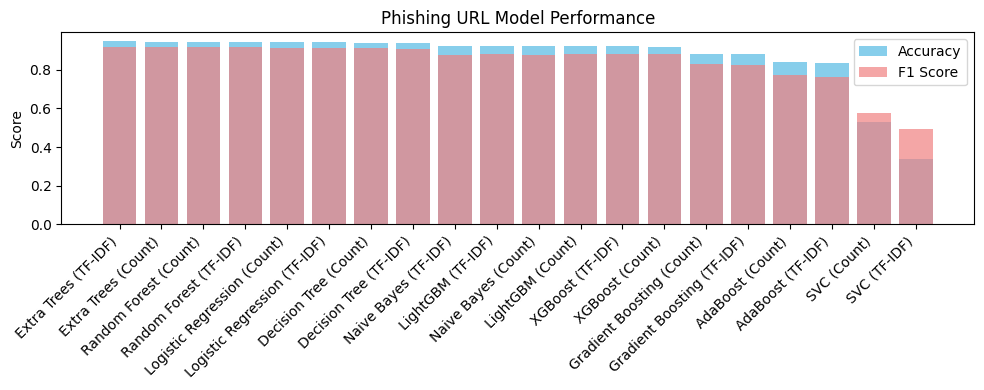

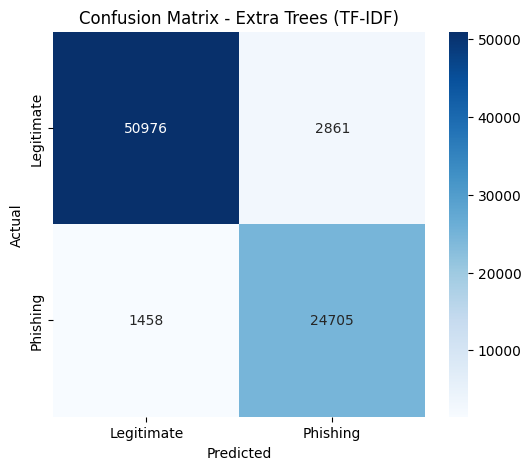

In [6]:
# Compare URL model performances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

comparison_url = []
for name, result in url_results.items():
    comparison_url.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'F1 Score': result['f1_score']
    })

comparison_url_df = pd.DataFrame(
    comparison_url).sort_values('Accuracy', ascending=False)
print(comparison_url_df.to_string(index=False))

best_url_model_name = comparison_url_df.iloc[0]['Model']
best_url_model = url_results[best_url_model_name]['model']
print(f"\nBest URL model: {best_url_model_name}")
print(f"Accuracy: {comparison_url_df.iloc[0]['Accuracy']:.4f}")

# Visualize accuracy and F1 score
plt.figure(figsize=(10, 4))
plt.bar(comparison_url_df['Model'], comparison_url_df['Accuracy'],
        color='skyblue', label='Accuracy')
plt.bar(comparison_url_df['Model'], comparison_url_df['F1 Score'],
        color='lightcoral', alpha=0.7, label='F1 Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Phishing URL Model Performance')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix for best model
y_pred_best = url_results[best_url_model_name]['predictions']
cm = confusion_matrix(url_y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title(f'Confusion Matrix - {best_url_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Create a function to predict URL status
def predict_url_status(url, model=None):
    """
    Predict if a URL is phishing (1) or legitimate (0) based on its text.

    Parameters:
    url (str): The URL to predict
    model: The trained model to use for prediction (default: best model)

    Returns:
    dict: Prediction result with probability scores
    """
    if model is None:
        model = best_url_model

    # Make prediction
    prediction = model.predict([url])[0]

    # Get prediction probabilities
    probabilities = model.predict_proba([url])[0]

    # Create result dictionary
    result = {
        'prediction': prediction,
        'status': 'Legitimate' if prediction == 1 else 'Phishing',
        'confidence': max(probabilities),
        'probability_legitimate': probabilities[0],
        'probability_phishing': probabilities[1]
    }

    return result

In [16]:
url_sample = ["google.com", "facebook.com", "phishing-test.com",
              "example.com", "malicious-site.com", 'facebook-test.com']

print("\nTesting URL prediction function:")
for url in url_sample:
    result = predict_url_status(url)
    print(f"URL: {url} | Prediction: {result['status']} | "
          f"Confidence: {result['confidence']:.4f} | "
          f"Prob Legitimate: {result['probability_legitimate']:.4f} | "
          f"Prob Phishing: {result['probability_phishing']:.4f}")


Testing URL prediction function:
URL: google.com | Prediction: Legitimate | Confidence: 0.6356 | Prob Legitimate: 0.3644 | Prob Phishing: 0.6356
URL: facebook.com | Prediction: Phishing | Confidence: 0.5059 | Prob Legitimate: 0.5059 | Prob Phishing: 0.4941
URL: phishing-test.com | Prediction: Phishing | Confidence: 1.0000 | Prob Legitimate: 1.0000 | Prob Phishing: 0.0000
URL: example.com | Prediction: Phishing | Confidence: 0.5503 | Prob Legitimate: 0.5503 | Prob Phishing: 0.4497
URL: malicious-site.com | Prediction: Phishing | Confidence: 0.8858 | Prob Legitimate: 0.8858 | Prob Phishing: 0.1142
URL: facebook-test.com | Prediction: Phishing | Confidence: 0.7793 | Prob Legitimate: 0.7793 | Prob Phishing: 0.2207
